In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({'mode': np.random.choice(['propane', 'ethane', 'decoke', 'hss'], size=20)})

# Create a mask to identify the rows where mode is not 'decoke'
mask = df['mode'] != 'decoke'

# Create a column 'decoke_time' and initialize it with 0
df['decoke_time'] = 0

# Use cumsum to increment the value of 'decoke_time' for subsequent rows where mode is not 'decoke'
df.loc[mask, 'decoke_time'] = np.cumsum(mask & (df['mode'] != df['mode'].shift(1)))

In [7]:
df

,mode,decoke_time
0,ethane,1
1,hss,2
2,hss,2
3,hss,2
4,ethane,3
5,ethane,3
6,propane,4
7,propane,4
8,hss,5
9,propane,6


In [ ]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

# Add decoke_time column and calculate values
decoke_time = []
count = 0
for m in df['mode']:
    if m == 'decoke':
        count = 0
    else:
        count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)

In [ ]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

# Add decoke_time column and calculate values
decoke_time = []
count = 0
for m in df['mode']:
    if m == 'decoke':
        count = 0
    else:
        count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)


In [8]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

decoke_time = []
count = 0
found_decoke = False
for m in df['mode']:
    if m == 'decoke':
        count = 0
        found_decoke = True
    else:
        if not found_decoke:
            count = 0
        else:
            count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)


       mode  decoke_time
0    ethane            0
1   propane            0
2       hss            0
3    decoke            0
4    ethane            1
5   propane            2
6   propane            3
7    ethane            4
8    decoke            0
9    decoke            0
10   ethane            1
11   ethane            2
12      hss            3
13  propane            4
14  propane            5
15   ethane            6
16   ethane            7
17      hss            8
18   decoke            0
19   ethane            1


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Create a simulated dataset
np.random.seed(123)
discrete_time_series = np.random.randint(0, 5, 100)
continuous_time_series = np.random.normal(0, 1, 100)

# Convert the time series to a pandas DataFrame
df = pd.DataFrame({'discrete': discrete_time_series, 'continuous': continuous_time_series})

# Create a lagged version of the DataFrame with the appropriate time lags
lags = 3
df_lagged = pd.concat([df.shift(i) for i in range(lags+1)], axis=1)
df_lagged.columns = ['discrete_t', 'continuous_t', 'discrete_t-1', 'continuous_t-1', 'discrete_t-2', 'continuous_t-2', 'discrete_t-3', 'continuous_t-3']

# Drop the rows with missing values
df_lagged = df_lagged.dropna()

# Split the dataset into a training set and a test set
train_size = int(len(df_lagged) * 0.8)
train = df_lagged[:train_size]
test = df_lagged[train_size:]

# Fit a VAR model to the training set
model = sm.tsa.VAR(train)

# Select the optimal lag order using the Akaike information criterion (AIC)
lag_order = model.select_order(maxlags=lags)

print(lag_order)

# Fit the VAR model with the optimal lag order to the training set
results = model.fit(1)

# Test for Granger causality from the discrete time series to the continuous time series
causality_test = results.test_causality('discrete', 'continuous', kind='f')

# Print the results of the causality test
print(causality_test.summary())


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC -> 1>


/Users/vayu/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: 'discrete' is not in list

/Users/vayu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == "__main__":


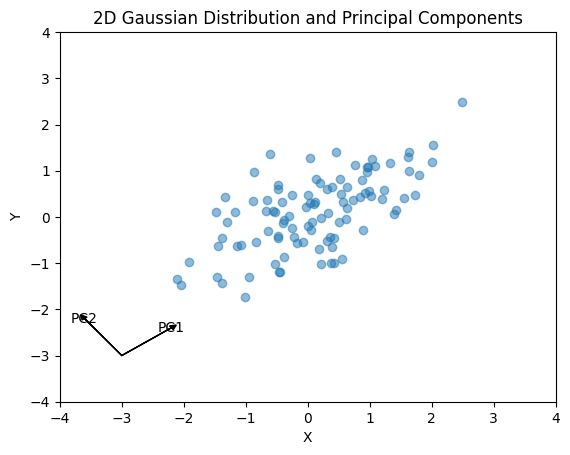

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate random data from a 2 dimensional Gaussian distribution
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.5], [1, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Step 2: Get the principle components using principle component analysis
pca = PCA(n_components=2)
pca.fit(X)
principal_components = pca.components_

# Step 3: Plot the data and principle components as arrows in a plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for i, (x, y) in enumerate(principal_components):
    plt.arrow(-3, -3, x, y, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.text(x-3, y-3, f"PC{i+1}", ha='center', va='center')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution and Principal Components')
plt.show()

In [17]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 22.5 MB/s eta 0:00:0000:01


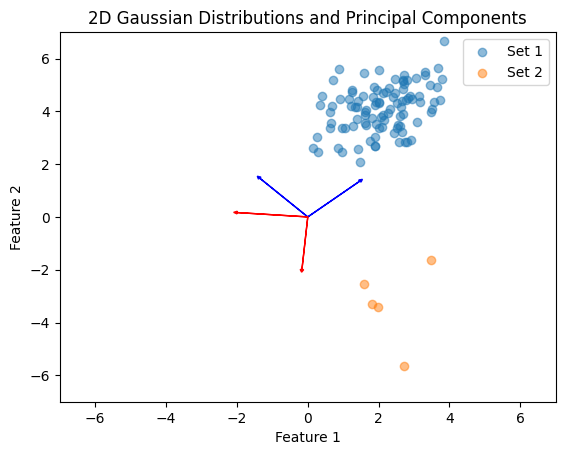

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate random data from two 2-dimensional Gaussian distributions
np.random.seed(42)
mean1 = [2, 4]
cov1 = [[1, 0.5], [0.5, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [2, -4]
cov2 = [[1, -0.5], [-0.5, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, 5)

# Step 2: Get the principle components using principle component analysis for both sets
pca1 = PCA(n_components=2)
pca1.fit(X1)
principal_components1 = pca1.components_

pca2 = PCA(n_components=2)
pca2.fit(np.concatenate([X1, X2]))
principal_components2 = pca2.components_

# Step 3: Plot the data and principle components as arrows in a plot
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label='Set 1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.5, label='Set 2')

for i, (x, y) in enumerate(principal_components1):
    plt.arrow(0, 0, x*2, y*2, head_width=0.1, head_length=0.1, fc='k', ec='b')
    #plt.text(x, y, f"PC{i+1} (Set 1)", ha='center', va='center')

for i, (x, y) in enumerate(principal_components2):
    plt.arrow(0, 0, x*2, y*2, head_width=0.1, head_length=0.1, fc='r', ec='r')
    #plt.text(x+2, y+2, f"PC{i+1} (Set 2)", ha='center', va='center')

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Gaussian Distributions and Principal Components')
plt.legend()
plt.show()

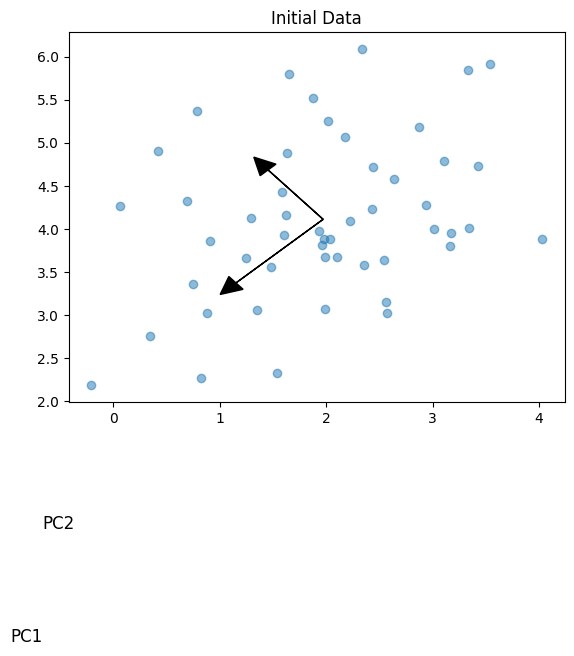

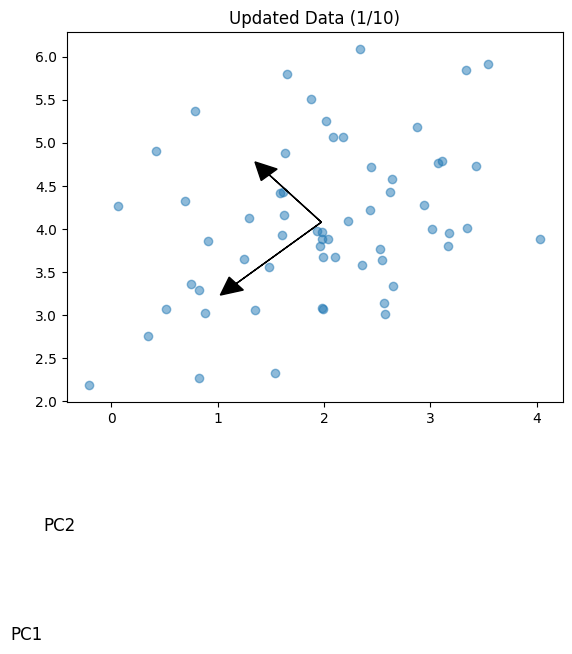

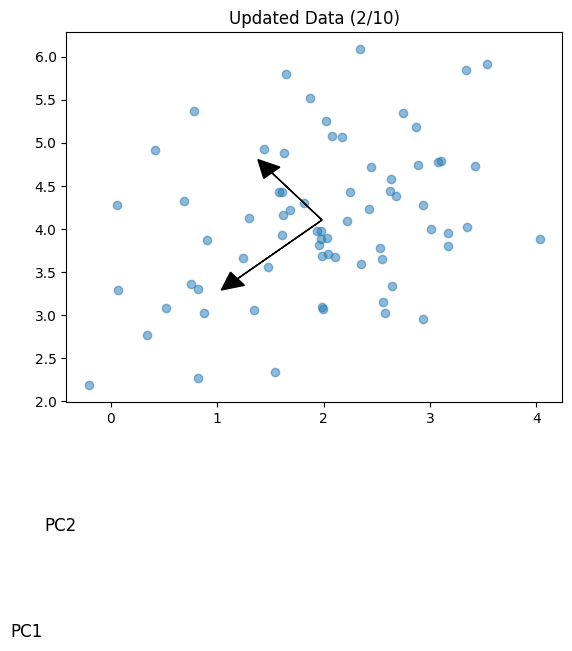

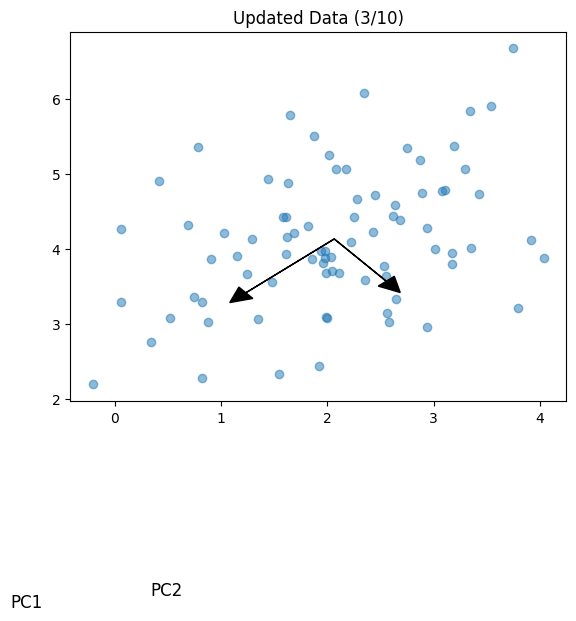

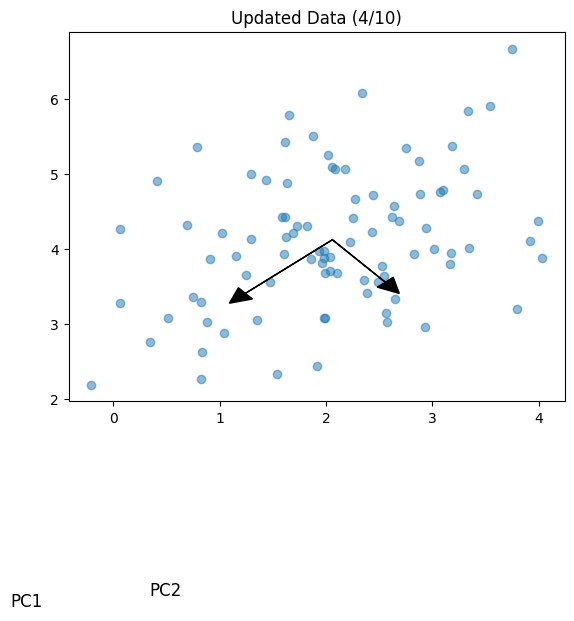

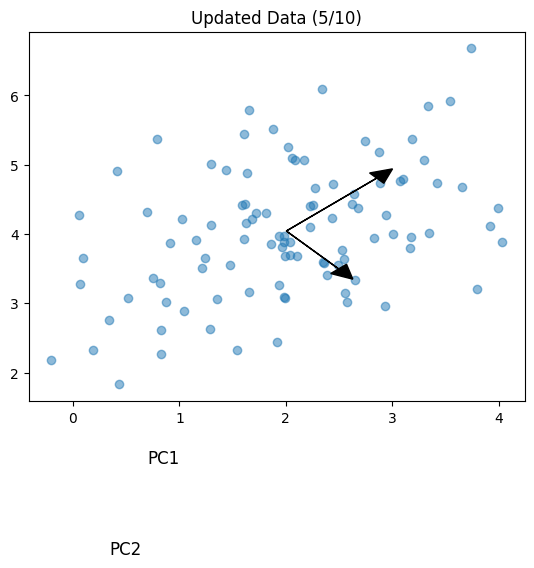

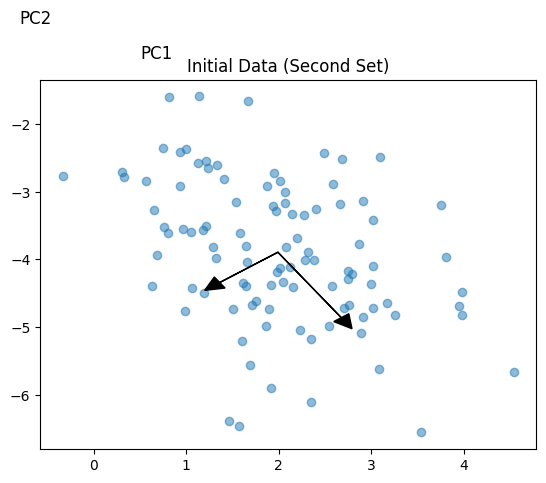

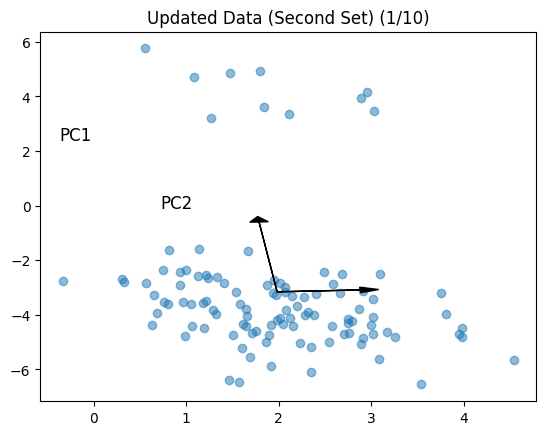

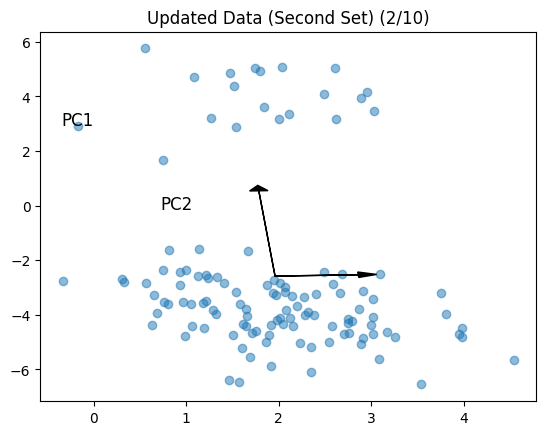

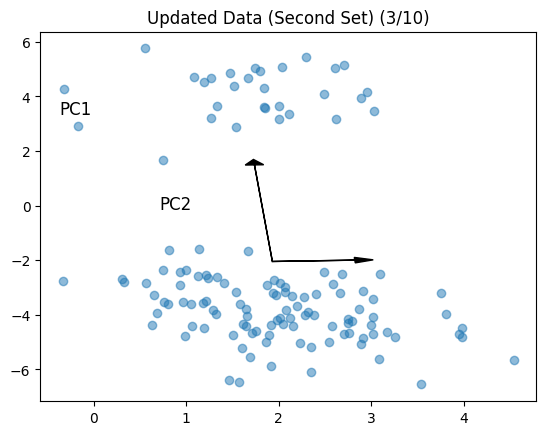

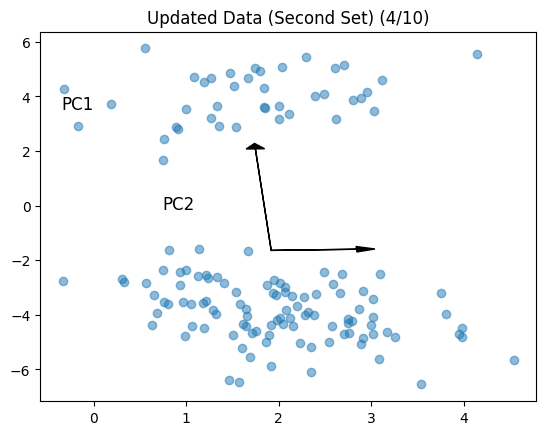

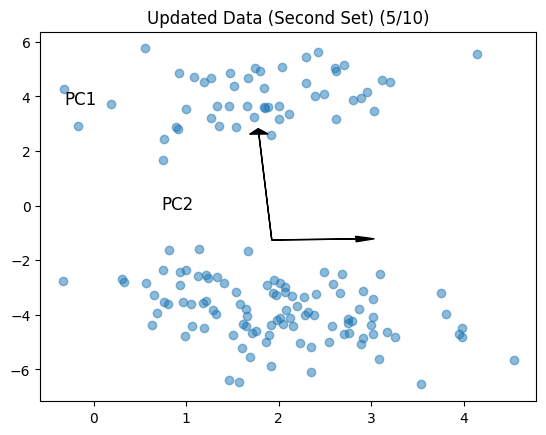

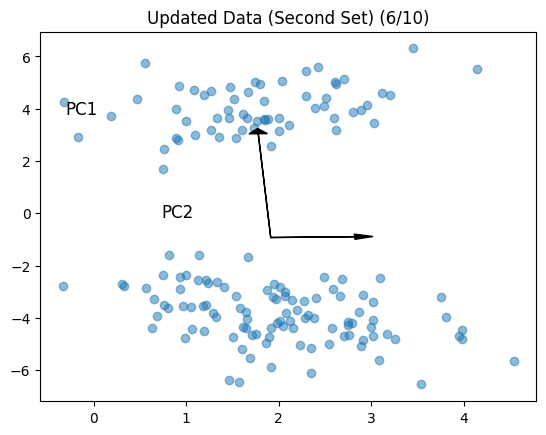

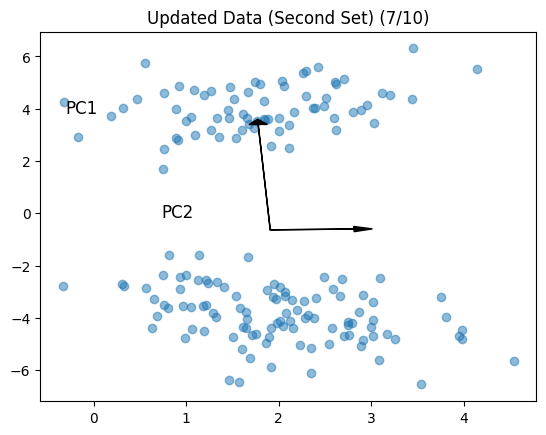

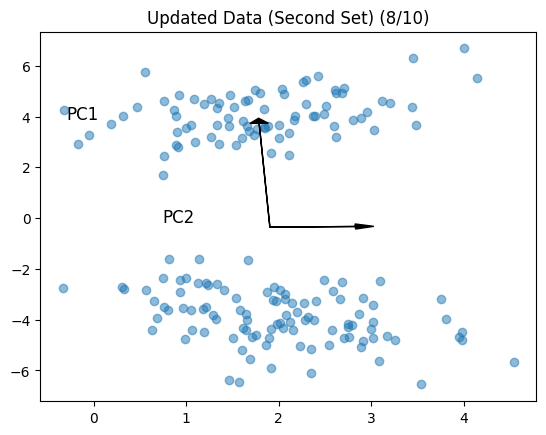

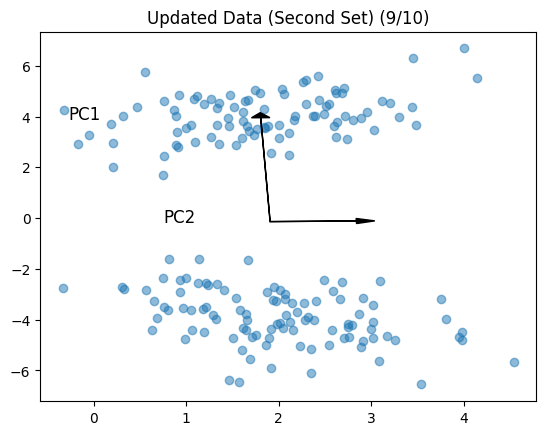

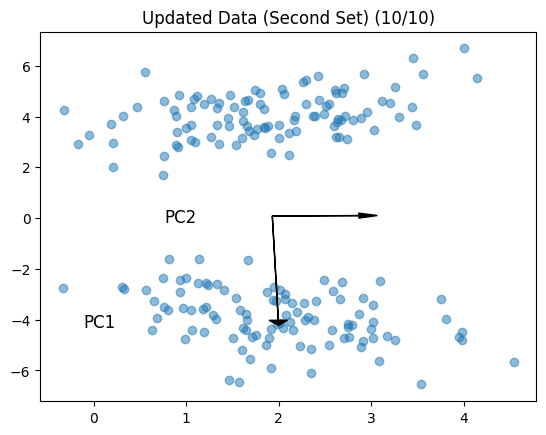

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define initial data
mean = [2, 4]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 50)

# Perform PCA on initial data
pca = PCA()
pca.fit(data)

# Define function to plot data and arrows
def plot_data_arrows(data, pca, title):
    fig, ax = plt.subplots()

    # Plot data points
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)

    # Plot arrows
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * np.sqrt(var)
        ax.arrow(pca.mean_[0], pca.mean_[1], comp[0], comp[1], 
                 head_width=0.2, head_length=0.2, fc='k', ec='k')
        ax.text(comp[0], comp[1], f"PC{i+1}", ha='center', va='center', fontsize=12)
    
    ax.set_title(title)
    plt.show()

# Plot initial data and arrows
plot_data_arrows(data, pca, "Initial Data")

# Define function to add new data and update PCA
def update_data_pca(data, pca):
    new_data = np.random.multivariate_normal(mean, cov, 10)
    data = np.concatenate([data, new_data])
    pca.fit(data)
    return data, pca

# Update data and PCA ten times
for i in range(5):
    data, pca = update_data_pca(data, pca)
    plot_data_arrows(data, pca, f"Updated Data ({i+1}/10)")

# Define second set of data
mean2 = [2, -4]
cov2 = [[1, -0.5], [-0.5, 1]]

# Perform PCA on second data set
data2 = np.random.multivariate_normal(mean2, cov2, 100)
pca2 = PCA()
pca2.fit(data2)

# Plot initial data and arrows for second set
plot_data_arrows(data2, pca2, "Initial Data (Second Set)")

# Update second data set and PCA ten times
for i in range(10):
    data2, pca2 = update_data_pca(data2, pca2)
    plot_data_arrows(data2, pca2, f"Updated Data (Second Set) ({i+1}/10)")


In [ ]:
import pandas as pd

# Define the file path and chunk size
file_path = 'path/to/your/file.csv'
chunk_size = 100000

# Define the column substring to match
col_substring = 'TURBINE_EXHAUST_TEMPERATURE'

# Initialize an empty dictionary to store the averages
averages = {}

# Iterate over the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):

    # Set the timestamp column as the index
    chunk.set_index('timestamp', inplace=True)

    # Get the column names that match the substring
    temp_cols = [col for col in chunk.columns if col_substring in col]

    # Calculate the average of the values in the columns
    temp_avg = chunk[temp_cols].mean(axis=1)

    # Append the averages to the dictionary
    averages.update(temp_avg)

# Convert the dictionary to a DataFrame
averages_df = pd.DataFrame.from_dict(averages, orient='index', columns=['average'])

# Sort the index
averages_df.sort_index(inplace=True)

# Display the resulting DataFrame
print(averages_df)


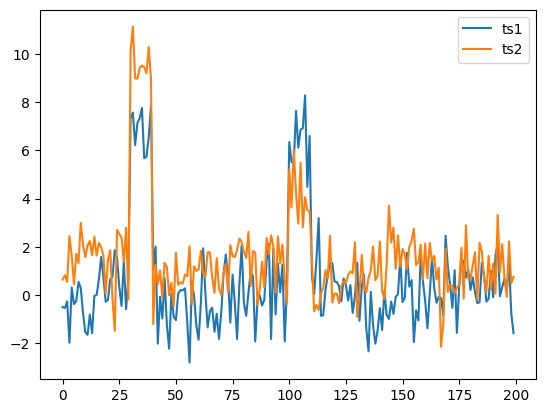

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate two time series data each from two different gaussian distribution
ts1 = pd.Series(np.random.normal(0, 1, 200))
ts2 = pd.Series(np.random.normal(1, 1, 200))

# Add data evaluated from a smooth polynomial function to data in Step 1
# x = np.arange(200)
# ts1 += 0.002 * np.polyval([0.2, 0.05, 0.05], x)
# ts2 += 0.002 * np.polyval([0.3, .1, 0.05], x)

# Add data evaluated from a very low frequency sinusoidal function to the data
ts1 += np.sin(np.linspace(0, 5*np.pi, 200))/2
ts2 += np.sin(np.linspace(0, 6*np.pi, 200))/2

# Add constant values to each time series simultaneously for a short duration at regular intervals
ts1[30:40] += 7
ts2[30:40] += 8.5

ts1[100:110] += 6
ts2[100:110] += 4

# Put these columns in a pandas dataframe
df = pd.DataFrame({'ts1': ts1, 'ts2': ts2})

# Plot these series
plt.plot(df['ts1'], label='ts1')
plt.plot(df['ts2'], label='ts2')
plt.legend()
plt.show()

In [4]:
# Define a function to remove outliers using z-score
def remove_outliers(df, column, z_thresh=3):
    # Calculate z-scores
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Filter out rows with z-scores higher than the threshold
    df_no_outliers = df[z_scores < z_thresh]

    return df_no_outliers

# Call the function to remove outliers from column 'A' in the dataframe
df_no_outliers = remove_outliers(df, 'A')

# Print the original and modified dataframes
print("Original DataFrame:")
print(df)
print("\nDataFrame without outliers:")
print(df_no_outliers)

KeyError: 'A'

In [5]:
def remove_outliers(df, column):
    # Calculate the median and IQR
    median = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = median - 3 * iqr
    upper_bound = median + 3 * iqr

    # Filter out rows with values outside the bounds
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div(
    children=[
        html.H1('My Dash Application'),
        dcc.Graph(
            id='my-graph',
            figure={
                'data': [{'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'Example'}],
                'layout': {'title': 'Graph Title'}
            }
        )
    ]
)

# Run the application
app.run_server(mode='inline')

ModuleNotFoundError: No module named 'dash'

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import colorlover as cl

# Step 1: Open the Excel sheet and read the first, second, and third columns
df = pd.read_excel('your_file.xlsx', sheet_name='SHEET1')

# Step 2: Extract the desired columns (month, column2, column3)
desired_columns = ['month', 'column2', 'column3']
df_selected = df[desired_columns]

# Step 3: Define a Dash app
app = dash.Dash(__name__)

# Get unique months from the dataframe
months = df_selected['month'].unique()

# Define the dropdown options
dropdown_options = [{'label': month, 'value': month} for month in months]

# Define the default selected month
default_month = months[0]

# Define the pleasing shades of blue using colorlover library
colors = cl.scales['9']['seq']['Blues']

# Define a helper function to filter the dataframe based on the selected month
def filter_dataframe(selected_month):
    return df_selected[df_selected['month'] == selected_month]

# Define a callback function for updating the bar chart based on the selected month
@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('month-dropdown', 'value')]
)
def update_bar_chart(selected_month):
    filtered_df = filter_dataframe(selected_month)
    
    # Create the bar chart trace for column2
    trace1 = go.Bar(
        x=filtered_df['month'],
        y=filtered_df['column2'],
        name='Column 2',
        marker=dict(color=colors[1])  # Use pleasing shade of blue for column2
    )

    # Create the bar chart trace for column3
    trace2 = go.Bar(
        x=filtered_df['month'],
        y=filtered_df['column3'],
        name='Column 3',
        marker=dict(color=colors[3])  # Use pleasing shade of blue for column3
    )

    # Combine the traces into data list
    data = [trace1, trace2]

    # Define the layout for the bar chart
    layout = go.Layout(
        title='Bar Chart',
        xaxis=dict(title='Month'),
        yaxis=dict(title='Values'),
        barmode='group',
        bargap=0.2,  # Add a gap between the bars
        width=400,  # Set the width of the chart
        height=600  # Set the height of the chart
    )

    # Combine the data and layout into a figure
    fig = go.Figure(data=data, layout=layout)
    
    return fig

# Step 4: Define the layout of the Dash app
app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='month-dropdown',
            options=dropdown_options,
            value=default_month
        ),
        dcc.Graph(id='bar-chart')
    ], style={'width': '75%'})
])

# Step 5: Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
